<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

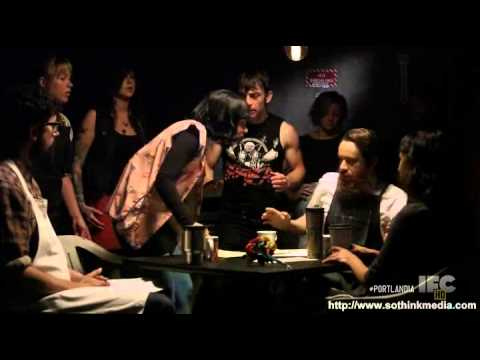

In [5]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [1]:
%pwd

'/Users/curtismckendrick/lambda school repositories/Class Notes/Unit-4-New/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [3]:
shops['star_rating'].value_counts()
# There are no 0 star ratings, so we can use a regular expression 
# to remove all non-numeric characters and all 0's to get the ratings

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [4]:
import re

for index in range(len(shops['star_rating'])):
    # we drop all non numeric characters and all 0's and convert the final string into an int()
    shops['star_rating'][index] = (re.sub(r'[^1-9]', '', shops['star_rating'][index]))

In [5]:
# not sure it's necessary to convert the column from object to int, but just to be safe I do.
shops['star_rating'] = pd.to_numeric(shops['star_rating'])
shops.dtypes

coffee_shop_name    object
full_review_text    object
star_rating          int64
dtype: object

In [6]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load('en_core_web_lg')

tokenizer = Tokenizer(nlp.vocab)

In [7]:
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4


In [8]:
column = shops['full_review_text'].tolist()

new_col = []
for i in column:
    # get rid of the dates at the beginning of the reviews
    i = ''.join([x for x in i if not x.isdigit()])
    # get rid of "//" at the beginning of strings as well as any additional whitepace on the ends
    i = re.sub(r'[^a-zA-Z]', ' ', i)
#     print(i)
    new_col.append(i)
shops['full_review_text'] = new_col
shops['full_review_text'].head()

0         check in Love love loved the atmosphere  ...
1        Listed in Date Night  Austin  Ambiance in ...
2         check in Listed in Brunch Spots I loved t...
3        Very cool decor  Good drinks Nice seating ...
4         check in They are located within the Nort...
Name: full_review_text, dtype: object

In [9]:
from collections import Counter

# I'm recreating the word count function used in class, trying to
# add comments at each step to show I know what's going on.

def count(docs): 
    #create the counters
    word_counts = Counter()
    appears_in = Counter()
    
    total_docs = len(docs)
    
    for doc in docs:
        # counts how many times any particular word appears across all reviews
        word_counts.update(doc)
        # a set doens't keep multiple instances, so this line counts
        # how many reviews a particular word appears in
        appears_in.update(set(doc))
    
    # extract the word counts and the words themselves from the counter object
    temp = zip(word_counts.keys(), word_counts.values())
    
    # create a pandas dataframe to hold the info
    wc = pd.DataFrame(temp, columns=['word', 'count'])
    
    # order the words in order of number of total appearances in descending order
    # and create the rank column with that information
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    
    # get total number of words to use in determining percentage appearance rates
    total = wc['count'].sum()
    # divide each individual count to get appears as a percentage of all words
    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
    
    # sort by the rank
    wc = wc.sort_values(by='rank')
    # get cumulative total of percentages
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    
    # extract the word appears in a doc string info and the words themseleves from the counter object
    temp2 = zip(appears_in.keys(), appears_in.values())
    # create a pandas dataframe with this info
    ac = pd.DataFrame(temp2, columns=['word', 'appears_in'])
    # combine wc and ac
    wc = ac.merge(wc, on='word')
    
    # get total number of reviews a word appered in as a percentage of total reviews
    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
    
    return wc.sort_values(by='rank')

In [10]:
# first batch of tokens
tokens = []

for string in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    str_tokens = [token.text for token in string]
    tokens.append(str_tokens)

shops['tokens'] = tokens

In [11]:
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
30,,7564,78596,1.0,0.086763,0.086763,0.993172
69,the,6527,27975,2.0,0.030882,0.117644,0.857012
49,and,6818,26035,3.0,0.028740,0.146384,0.895221
38,I,5834,24342,4.0,0.026871,0.173256,0.766019
36,a,6185,22203,5.0,0.024510,0.197766,0.812106


In [12]:
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
30,,7564,78596,1.0,0.086763,0.086763,0.993172
69,the,6527,27975,2.0,0.030882,0.117644,0.857012
49,and,6818,26035,3.0,0.028740,0.146384,0.895221
38,I,5834,24342,4.0,0.026871,0.173256,0.766019
36,a,6185,22203,5.0,0.024510,0.197766,0.812106


In [13]:
# expand stop words
STOPS = nlp.Defaults.stop_words.union(['', ' ', '  ', '   ', '    ', '     ', ',', 'food',
                                       'like', "it's", 'coffee', 'got', 'tea', 'work', 'staff', 
                                       's', 't', 'm', 'check', 'austin', 'try', 'iced',
                                      'place', 've', 'shop', 'latte', 'don', 'ins', 'drink'])

# Now we get to work on getting rid of stop words again
tokens = []

for string in tokenizer.pipe(shops['full_review_text'], batch_size=500):

    str_tokens = []
#     print(str_tokens)
    
    for token in string:
#         print(token)
        if (token.text.lower() not in STOPS) and (token.is_punct == False):
            str_tokens.append(token.text.lower())
    
    tokens.append(str_tokens)

shops['tokens'] = tokens
# shops.head()

In [14]:
wc = count(shops['tokens'])
wc.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
150,good,2797,4003,1.0,0.012626,0.012626,0.367253
96,great,2845,3939,2.0,0.012424,0.025050,0.373556
13,love,1502,1946,3.0,0.006138,0.031187,0.197216
487,time,1488,1907,4.0,0.006015,0.037202,0.195378
46,nice,1474,1755,5.0,0.005535,0.042738,0.193540
184,friendly,1612,1706,6.0,0.005381,0.048118,0.211660
595,little,1243,1506,7.0,0.004750,0.052868,0.163209
406,people,1181,1455,8.0,0.004589,0.057458,0.155068
778,delicious,1272,1413,9.0,0.004457,0.061914,0.167017
139,service,1208,1383,10.0,0.004362,0.066276,0.158613


In [15]:
wc = wc[wc['appears_in_pct'] >= .025]
wc.tail()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
492,days,194,204,304.0,0.000643,0.474425,0.025473
574,tastes,191,200,309.0,0.000631,0.477614,0.025079
628,week,192,199,310.0,0.000628,0.478242,0.025210
1310,crowded,192,199,311.0,0.000628,0.478869,0.025210
63,expect,191,198,313.0,0.000625,0.480118,0.025079


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [16]:
shops = shops.copy()
bad_shops = shops[shops['star_rating'] <= 3]
bad_shops = bad_shops.copy()
good_shops = shops[shops['star_rating'] > 3]
good_shops = good_shops.copy()

tokens = []
for string in tokenizer.pipe(bad_shops['full_review_text'], batch_size=500):

    str_tokens = []
#     print(str_tokens)
    
    for token in string:
#         print(token)
        if (token.text.lower() not in STOPS) and (token.is_punct == False):
            str_tokens.append(token.text.lower())
    
    tokens.append(str_tokens)
bad_shops['tokens'] = tokens


tokens = []
for string in tokenizer.pipe(good_shops['full_review_text'], batch_size=500):

    str_tokens = []
#     print(str_tokens)
    
    for token in string:
#         print(token)
        if (token.text.lower() not in STOPS) and (token.is_punct == False):
            str_tokens.append(token.text.lower())
    
    tokens.append(str_tokens)
good_shops['tokens'] = tokens

In [17]:
wc_bad = count(bad_shops['tokens'])
wc_good = count(good_shops['tokens'])

In [18]:
wc_bad.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
20,good,598,883,1.0,0.012584,0.012584,0.405149
200,time,358,484,2.0,0.006898,0.019482,0.242547
98,great,344,466,3.0,0.006641,0.026124,0.233062
5,service,347,449,4.0,0.006399,0.032523,0.235095
72,people,287,386,5.0,0.005501,0.038024,0.194444
99,pretty,285,366,6.0,0.005216,0.043240,0.193089
18,nice,283,351,7.0,0.005002,0.048243,0.191734
195,order,213,339,8.0,0.004831,0.053074,0.144309
273,ordered,257,325,9.0,0.004632,0.057706,0.174119
32,come,241,295,10.0,0.004204,0.061910,0.163279


In [19]:
wc_good.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
96,great,2501,3473,1.0,0.014067,0.014067,0.407329
186,good,2199,3120,2.0,0.012637,0.026705,0.358143
13,love,1323,1735,3.0,0.007028,0.033732,0.215472
159,friendly,1427,1501,4.0,0.006080,0.039812,0.232410
383,time,1130,1423,5.0,0.005764,0.045576,0.184039
46,nice,1191,1404,6.0,0.005687,0.051263,0.193974
667,delicious,1187,1323,7.0,0.005359,0.056622,0.193322
469,little,1036,1252,8.0,0.005071,0.061693,0.168730
328,best,1023,1203,9.0,0.004873,0.066565,0.166612
593,people,894,1069,10.0,0.004330,0.070895,0.145603


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [20]:
wc_side_by_side = wc_good.merge(wc_bad, on='word')

In [21]:
rel_diff = abs(wc_side_by_side['pct_total_x'] - wc_side_by_side['pct_total_y'])

In [22]:
wc_side_by_side.head()

,word,appears_in_x,count_x,rank_x,pct_total_x,cul_pct_total_x,appears_in_pct_x,appears_in_y,count_y,rank_y,pct_total_y,cul_pct_total_y,appears_in_pct_y
0,great,2501,3473,1.0,0.014067,0.014067,0.407329,344,466,3.0,0.006641,0.026124,0.233062
1,good,2199,3120,2.0,0.012637,0.026705,0.358143,598,883,1.0,0.012584,0.012584,0.405149
2,love,1323,1735,3.0,0.007028,0.033732,0.215472,179,211,18.0,0.003007,0.089274,0.121274
3,friendly,1427,1501,4.0,0.006080,0.039812,0.232410,185,205,20.0,0.002922,0.095132,0.125339
4,time,1130,1423,5.0,0.005764,0.045576,0.184039,358,484,2.0,0.006898,0.019482,0.242547


In [23]:
d = {'word': wc_side_by_side['word'], 'relative_diff': rel_diff}
rel_diff_df = pd.DataFrame(data=d)
rel_diff_df = rel_diff_df.sort_values(by='relative_diff', ascending=False)
rel_diff_df.head(10)

,word,relative_diff
0,great,0.007426
6,delicious,0.004076
2,love,0.004020
8,best,0.003490
3,friendly,0.003158
14,service,0.002616
21,amazing,0.002487
369,asked,0.002375
40,order,0.002340
27,perfect,0.002249


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

